# Building MicroGrad from scratch

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Core value  object of micrograd and it visualization

In [2]:
class Value:
#the __init__ method to initialize the object
    def __init__(self, data,_children=(), _op='',label=""): 
        
        self.data= data
        #initially assume that will be 0 means no effect
        self.grad=0.0 
        self._prev=set(_children)
        self._op = _op
        self.label=label
        
        
#special method used to represent a class's objects as a string       
    def __repr__(self): 
        return f"Value(data={self.data})"
    
    def __add__(self,other): 
        out= Value(self.data + other.data,(self,other),'+')
        #(self,other) is _children
        return out
    
    def __mul__(self,other):
        out= Value(self.data*other.data, (self,other),'*')
        #(self,other) is _children
        return out
    
    #created for Manual backpropagation example 2 (a neuron)
    def tanh(self): 
        x=self.data
        #Hyperpolic tangent exponential function
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t, (self, ),'tanh') #(self, ) means just one child
        return out
        
        
    
    

a=Value(2.0,label="a")
b=Value(-3.0,label="b")
c=Value(10.0,label="c")
e=a*b; e.label="e"
d=e+c ;d.label="d"
f=Value(-2.0,label='f')
L=d*f ; L.label="L"
L

Value(data=-8.0)

**grad**

take note that ``self.grad`` is the derivative of a function that has more than one input variable (exp:dL/df).

The gradient simply measures the change in all weights with regard to the change in error.


-------------------------------------------------------------------------------
``set()``
Set items are **unordered**, **unchangeable**, and **do not allow duplicate values**.

**unordered** - items in a set do not have a defined order.

**unchangeable** - cannot change the items after the set has been created.

### Visualization

In [3]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
        for child in v._prev:
            edges.add((child, v))
            build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
          # if this value is a result of some operation, create an op node for it
          dot.node(name = uid + n._op, label = n._op)
          # and connect this node to it
          dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


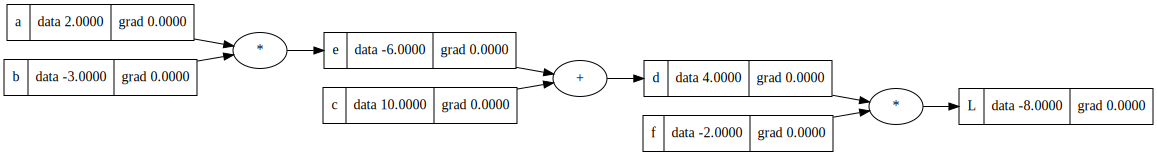

In [4]:
draw_dot(L)

## Manual Backpropagation example 1 (simple expression)

In [5]:

#Gradient Check
def lol():
    
    h=0.0001
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 + h ,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to a becoz we bumped a little bit by h

6.000000000021544


In [6]:
#if we manually let L.grad=1
L.grad=1.0 

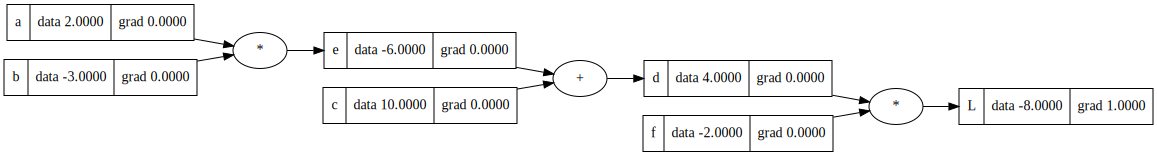

In [7]:
draw_dot(L)

Basically we have 

L=d*f

we would like to know

dL/dd= ?

it will be dL/dd= f


**definiton of derivative**

**(f(x+h)-f(x))/h**

**proof**
((d+h)*f - d*f)/h

=(d*f+h*f -d*f)/h

=h*f/h

= f




**L=d*f**

According to the visual above, we know that 

dL/df= d

then

f.grad =4.0 


dL/dd= f

then

d.grad=-2





 

In [8]:
f.grad =4.0 
d.grad=-2.0

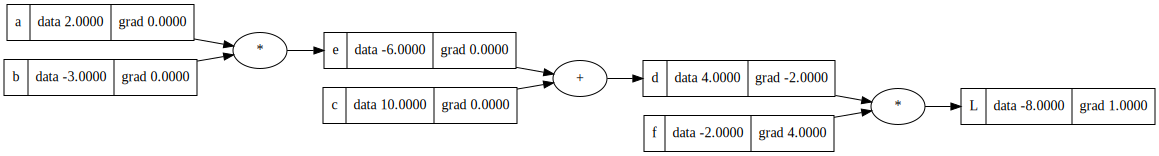

In [9]:
#the result will be
draw_dot(L)

In [10]:
#checking the answer f.grad is correct or not?

#Gradient Check
def lol():
    
    h=0.0001
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0 +h,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to f becoz we bumped a little bit by h

#it just f.grad or dL/df

3.9999999999995595


In [11]:
#checking the answer d.grad is correct or not?

#Gradient Check

def lol():
    
    h=0.0001
    
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    d.data+=h
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to d becoz we bumped a little bit by h

#it just d.grad or dL/dd

-1.9999999999953388


Next we need to derive **dL/dc**

dd/dc ?

d=c+e

dd/dc=1

**definiton of derivative**

**(f(x+h)-f(x))/h**

**Proof for dd/dc=1**
( ( (c+h)+e )-(c+e) )/h

=(c+h+e-c-e)/h

=h/h

=1

dd/de= 1 too.

-----------------------------------------------------------------------------

take note that dd/dc and dd/de are the infomation **how c and e impact d**, which are local gradient

and our **goal is to know how e and c impact L.**

To find **dL/dc** and **dL/de**, use **chain rule**

dL/dc= (dl/dd)*(dd/dc) = -2 *1= -2

dL/de=(dl/dd)*(dd/de)=-2 *1 = -2 


Hence 

c.grad=-2.0
e.grad = -2.0



In [12]:
c.grad=-2.0
e.grad = -2.0

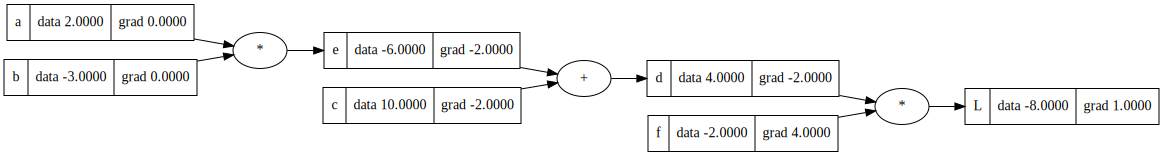

In [13]:
#the result will be
draw_dot(L)

In [14]:
#Gradient Check

def lol():
    
    h=0.0001
    
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    c.data+=h
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to c becoz we bumped a little bit by h

#it just c.grad or dL/dc

-1.9999999999953388


In [15]:
#Gradient Check

def lol():
    
    h=0.0001
    
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    e.data+=h
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to e becoz we bumped a little bit by h

#it just e.grad or dL/de

-1.9999999999953388


Next we need to derive **dL/da** and  **dL/db**

we known that

dL/de=-2.0

then 

dL/da=(dL/de)*(de/da)

dL/db=(dL/de)*(de/db)



We need To find local gradient which de/da

e=a*b

de/da=b = -3
de/db=a = 2

then

dL/da=(dL/de)*(de/da)= -2 * -3 = 6

dL/db=(dL/de)*(de/db)= -2 * 2 = -4

Hence

a.grad=6
b.grad=-4

In [16]:
a.grad=6.0
b.grad=-4.0

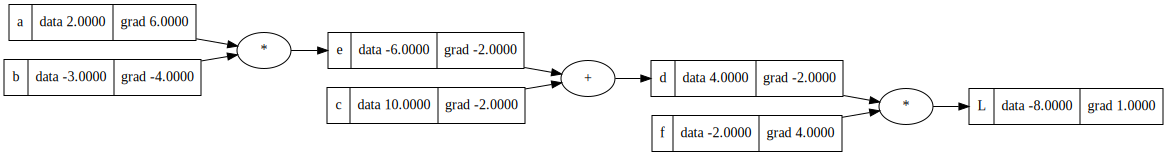

In [17]:
#the result will be
draw_dot(L)

In [18]:
#Gradient Check

def lol():
    
    h=0.001
    
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    a.data+=h
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to a becoz we bumped a little bit by h

#it just a.grad or dL/da

6.000000000000227


In [19]:
#Gradient Check

def lol():
    
    h=0.001
    
    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L1=L.data 
    #careful that l is value node, and we want its data, then L.data
    
    a=Value(2.0 ,label="a")
    b=Value(-3.0,label="b")
    b.data+=h
    c=Value(10.0,label="c")
    e=a*b; e.label="e"
    d=e+c ;d.label="d"
    f=Value(-2.0,label='f')
    L=d*f ; L.label="L"
    L2=L.data
    #careful that l is value node, and we want its data, then L.data
    
    
    print((L2-L1)/h)
    
lol() #L with respect to b becoz we bumped a little bit by h

#it just b.grad or dL/db

-3.9999999999995595


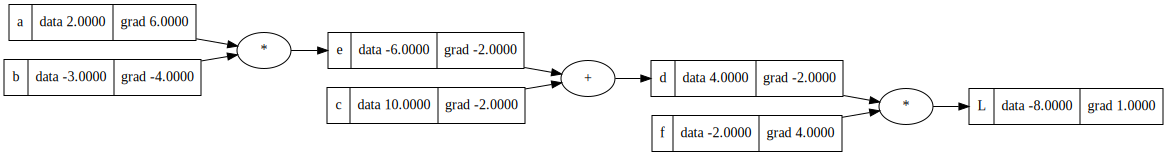

In [20]:
#the final result
draw_dot(L)

We **iterated through all of the nodes one by one, applying the chain rule locally**.

We can determine the **derivative of L with respect to the variables (a,b,c....,f)**. We have pointers to the children nodes and perform some operation on them to find output (the derivative of L with respect to the variables). These operations allow us to determine the local derivatives.

In fact, **the operations mean that we just go through and recursively multiply on the local derivative. It is just recursive application of chain rule backwards through the computation graph.**

##  Preview of single optimization step

If we want to increase L, we should increase the data in the direction of gradient by small step amount.

In [21]:
a.data += 0.01 * a.grad #step size
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad


e=a*b; 
d=e+c 
L=d*f ; L.label="L"

print(L.data)

-7.286496


In the above example, we expect the value will be less negative.

It tell us that the gradient really give us some power because we know how to influence the final outcome.

It will be extremely useful for training knowledge.

 ## Manual backpropagation example 2 (a neuron)

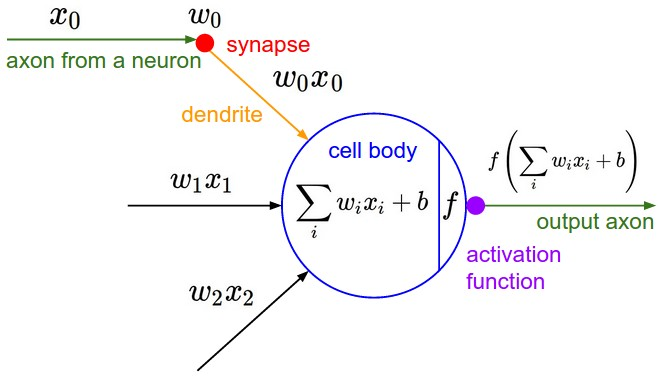

In [22]:
from IPython import display
display.Image("photo/neuron_model.jpeg")

**Convolutional Neural network for visual Recognition**

We have same input (axon), then have synapse that have weigh on them (axon).

The synapse interact with the input to this neuron multiplicatively (WX).

Since we have many W times X flowing into the cellbody, and then the cell body have some bias.

Hence the equation will be $$\sum_{i} w_i x_i +b$$.

Thus, take it through an activation function. Activiaton function is some kind of squashing function (tanh).





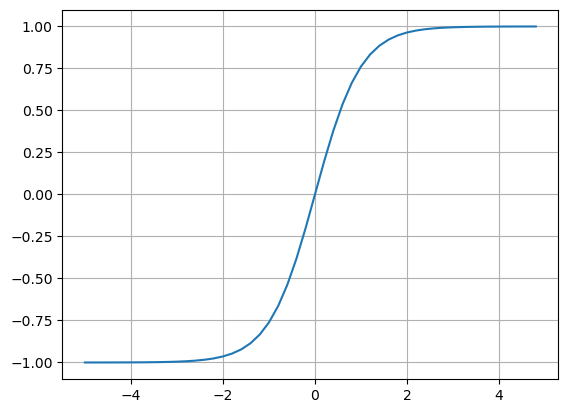

In [23]:
# example of activation function (squashing function)

plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

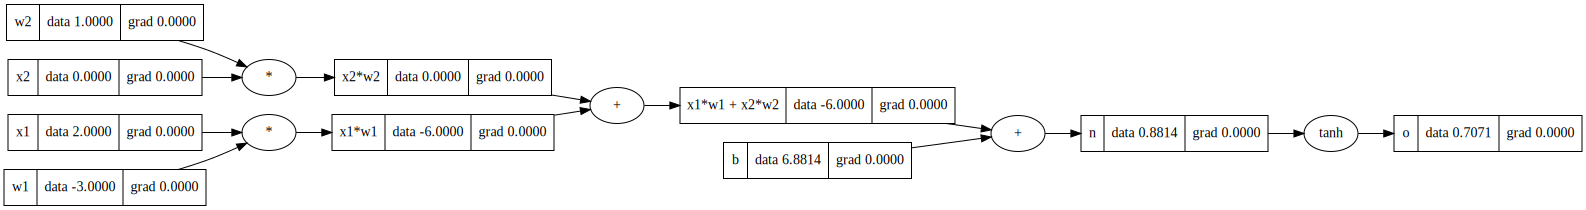

In [24]:
# inputs x1,x2
# 2d neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights of the neurons w1,w2
#synaptic strengths for each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
#activation function output  
o = n.tanh();o.label = 'o'


draw_dot(o)

Since we cannot make ``tanh`` out of just ``+`` and ``*``. This is becuase it is hyperbolic function exponentiation involve.

Then we will need to define **exponentiation function** in the ``class Value``



In [25]:
# let o.grad=1
o.grad=1.0

o =tahnh(n)

do/dn = 1-tanh^2(n) = 1-o**2

Then n.grad=0.5

In [26]:
n.grad=round(1-o.data**2,2)

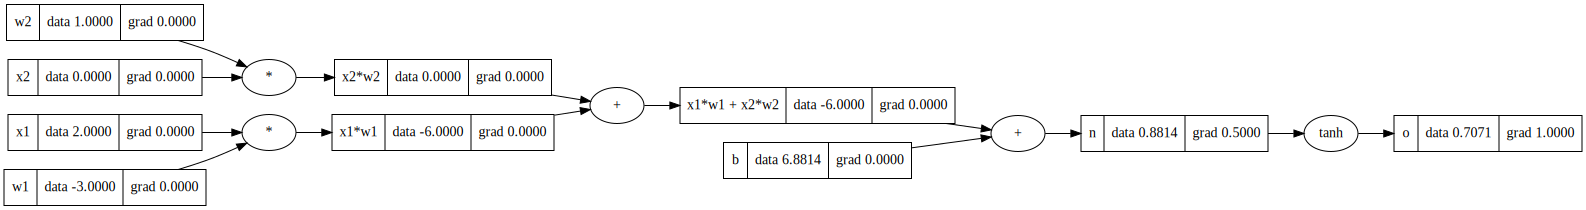

In [27]:
draw_dot(o)

Based on previous example, a plus just a distributor of gradient. The gradint will simply flow equally, because the ``x1w1x2w2`` local derivative is 1.

Then ``x1w1x2w2.grad=1``

Same happen to the ``x2*w2`` and ``x1*w1``

In [28]:
x1w1x2w2.grad=0.5
b.grad=0.5

x1w1.grad=0.5
x2w2.grad=0.5

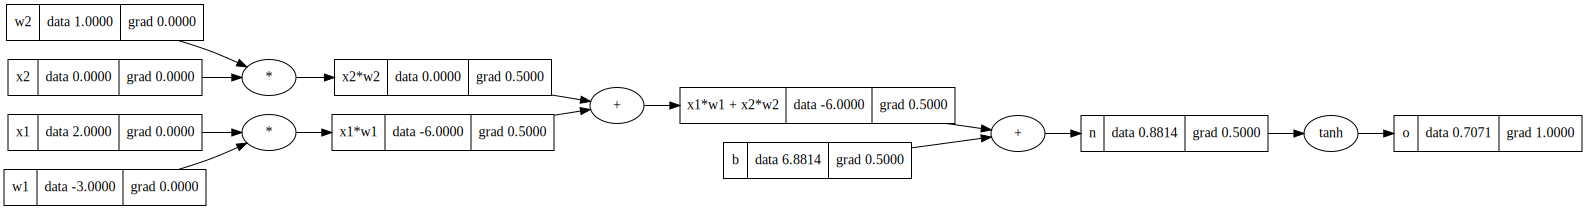

In [29]:
draw_dot(o)

do/dw2 = do/dx2w2 * dx2w1/dw2 = x2w2.grad * x2.data

same for other

do/dx2= x2w2.grad * w2.data 
.
.
.
.



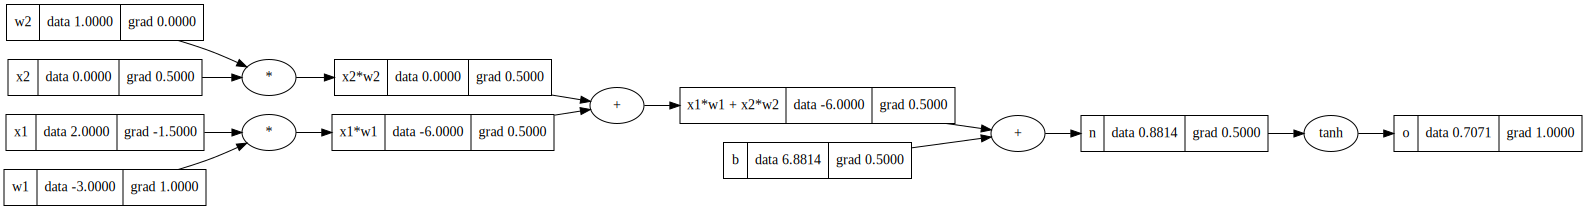

In [30]:
w1.grad= x1w1.grad * x1.data
x1.grad= x1w1.grad * w1.data

w2.grad= x2w2.grad * x2.data
x2.grad= x2w2.grad * w2.data

draw_dot(o)

If we want this neuron output to increase :

W2 have no gradient, then does not matter to the neuron 

w1, the gradient of w1 should be go up , then the neuron output will go up .

## Implementing the backward function for each operations

no more manual backpogaration 

In [31]:
# Implementing the backward function for each operations

class Value:
#the __init__ method to initialize the object
    def __init__(self, data,_children=(), _op='',label=""): 
        
        self.data= data
        #initially assume that will be 0 means no effect
        self.grad=0.0 
        #backward function 
        self._backward= lambda :None #empty function
        self._prev=set(_children)
        self._op = _op
        self.label=label
        
        
#special method used to represent a class's objects as a string       
    def __repr__(self): 
        return f"Value(data={self.data})"
    
    def __add__(self,other): 
        #(self,other) is _children
        out= Value(self.data + other.data,(self,other),'+')

        # define the function that propagates the gradient
        def _backward():
            # if addition, it will 1.0
            self.grad= 1.0* out.grad 
            other.grad =1.0* out.grad 

        out._backward=_backward

        return out
    
    def __mul__(self,other):
        #(self,other) is _children
        out= Value(self.data*other.data, (self,other),'*')

        # define the function that propagates the gradient
        def _backward():
            
            self.grad=other.data * out.grad
            other.grad=self.data * out.grad 

        out._backward=_backward

        return out
    
    #created for Manual backpropagation example 2 (a neuron)
    def tanh(self): 
        x=self.data
        #Hyperpolic tangent exponential function
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t, (self, ),'tanh') #(self, ) means just one child

        def _backward() :
            self.grad =(1-t**2) * out.grad 


        out._backward=_backward
        return out

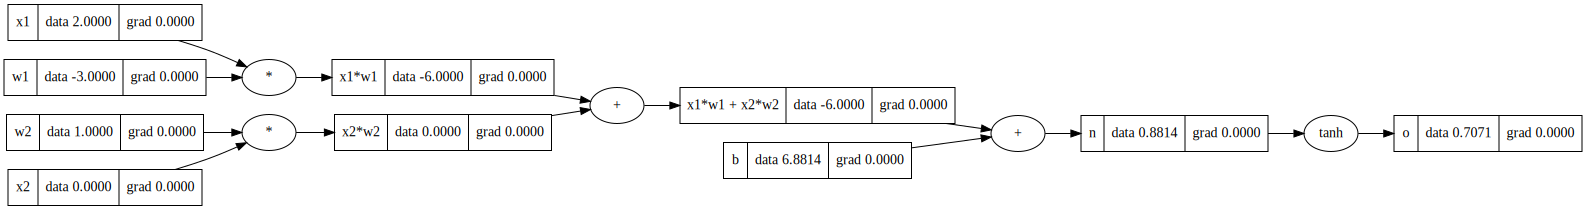

In [32]:
# inputs x1,x2
# 2d neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights of the neurons w1,w2
#synaptic strengths for each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
#activation function output  
o = n.tanh();o.label = 'o'


draw_dot(o)

Now, we dont have to the backpogaration manually 

In [33]:
#To initialize with 1
o.grad= 1.0

In [34]:
o._backward()

n._backward()
b._backward() # b is a leaf node, nothing will be happen (empty function)

x1w1x2w2._backward()

x2w2._backward()
x1w1._backward()


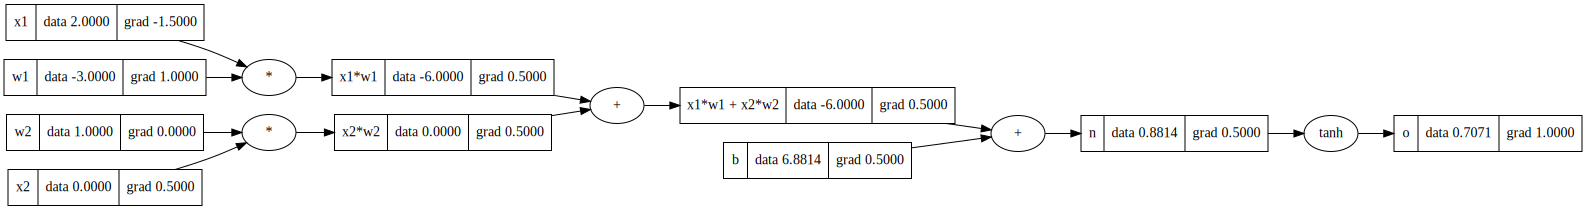

In [35]:
draw_dot(o)

## Implementing the backward function for a whole expressive graph

Topological sort 

![topology sort](https://github.com/soonkienyuan/NOTE-build-from-scratch-neural-networks-Micrograd/blob/main/photo/1_uMg_ojFXts2WZSjcZe4oRQ.png?raw=true=10x10)

In [36]:
# Implementing the backward function for each operations

class Value:
#the __init__ method to initialize the object
    def __init__(self, data,_children=(), _op='',label=""): 
        
        self.data= data
        #initially assume that will be 0 means no effect
        self.grad=0.0 
        #backward function 
        self._backward= lambda :None #empty function
        self._prev=set(_children)
        self._op = _op
        self.label=label
        
        
#special method used to represent a class's objects as a string       
    def __repr__(self): 
        return f"Value(data={self.data})"
    
    def __add__(self,other): 
        #(self,other) is _children
        out= Value(self.data + other.data,(self,other),'+')

        # define the function that propagates the gradient
        def _backward():
            # if addition, it will 1.0
            self.grad= 1.0* out.grad 
            other.grad =1.0* out.grad 

        out._backward=_backward

        return out
    
    def __mul__(self,other):
        #(self,other) is _children
        out= Value(self.data*other.data, (self,other),'*')

        # define the function that propagates the gradient
        def _backward():
            
            self.grad=other.data * out.grad
            other.grad=self.data * out.grad 

        out._backward=_backward

        return out
    #backward function
    def backward(self):
        #topology sort
        topo =[]
        visited=set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad=1.0
        for node in reversed(topo):
            node._backward()
        
    
    #created for Manual backpropagation example 2 (a neuron)
    def tanh(self): 
        x=self.data
        #Hyperpolic tangent exponential function
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t, (self, ),'tanh') #(self, ) means just one child

        def _backward() :
            self.grad =(1-t**2) * out.grad 


        out._backward=_backward
        return out

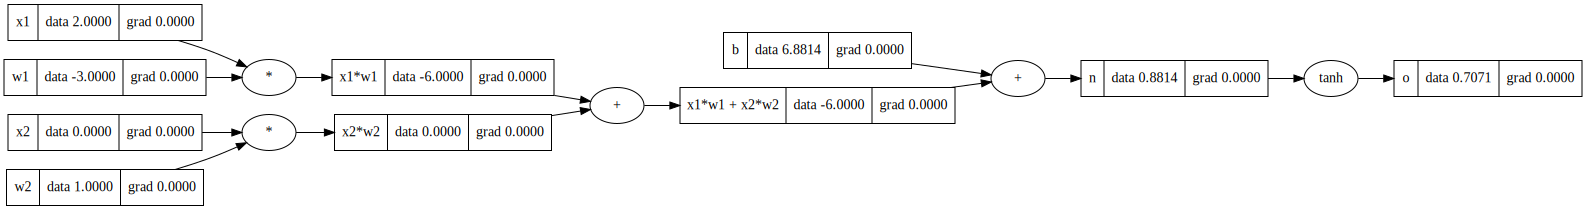

In [37]:
# inputs x1,x2
# 2d neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights of the neurons w1,w2
#synaptic strengths for each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
#activation function output  
o = n.tanh();o.label = 'o'


draw_dot(o)

In [38]:
o.backward()

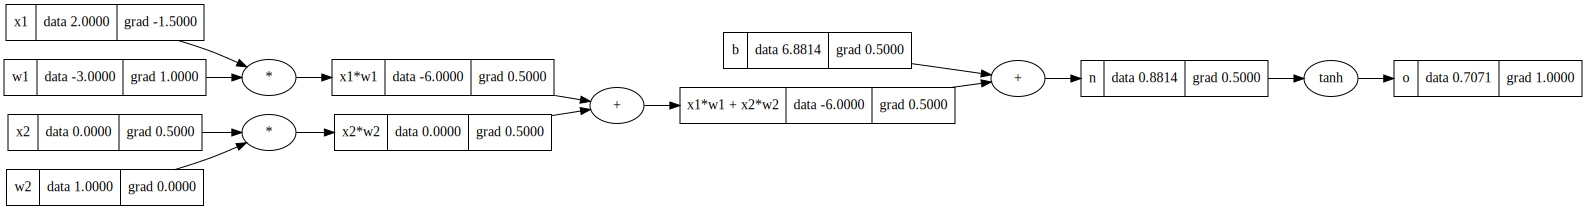

In [39]:
draw_dot(o)

## Fixing backpropagation bug when one node is used multiple times

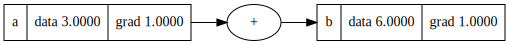

In [40]:
a=Value(3.0,label="a")
b=a+a ; b.label="b"

b.backward()
draw_dot(b)

we can see that the forward pass worked. 3+3 is 6

But the gradient is wrong,  should be db/da=1+1=2

**Basically, we are going to see an issue when we use a variable more than once**

In [41]:
# Implementing the backward function for each operations

class Value:
#the __init__ method to initialize the object
    def __init__(self, data,_children=(), _op='',label=""): 
        
        self.data= data
        #initially assume that will be 0 means no effect
        self.grad=0.0 
        #backward function 
        self._backward= lambda :None #empty function
        self._prev=set(_children)
        self._op = _op
        self.label=label
        
        
#special method used to represent a class's objects as a string       
    def __repr__(self): 
        return f"Value(data={self.data})"
    
    def __add__(self,other): 
        #(self,other) is _children
        out= Value(self.data + other.data,(self,other),'+')

        # define the function that propagates the gradient
        def _backward():
            # if addition, it will 1.0
            self.grad+= 1.0* out.grad # fix for the error change from + to +=
            other.grad +=1.0* out.grad # fix for the error change from + to +=

        out._backward=_backward

        return out
    
    def __mul__(self,other):
        #(self,other) is _children
        out= Value(self.data*other.data, (self,other),'*')

        # define the function that propagates the gradient
        def _backward():
            
            self.grad+=other.data * out.grad # fix for the error change from + to +=
            other.grad+=self.data * out.grad # fix for the error change from + to +=

        out._backward=_backward

        return out
    #backward function
    def backward(self):
        #topology sort
        topo =[]
        visited=set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad=1.0
        for node in reversed(topo):
            node._backward()
        
    
    #created for Manual backpropagation example 2 (a neuron)
    def tanh(self): 
        x=self.data
        #Hyperpolic tangent exponential function
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t, (self, ),'tanh') #(self, ) means just one child

        def _backward() :
            self.grad +=(1-t**2) * out.grad # fix for the error change from + to +=


        out._backward=_backward
        return out

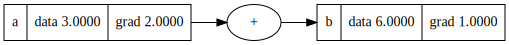

In [42]:
a=Value(3.0,label="a")
b=a+a ; b.label="b"

b.backward()
draw_dot(b)

## Breaking up a tanh, exercising with more operations


In [43]:
a=Value(2.0)
#a+1

Since 1 is not the ``Value`` object. the fix will add ``other = other if isinstance(other,Value) else Value(other)`` in __add__(self,other) and __mul__(self,other):

Basically 

a=Value(2.0)
a*2 is
a.__mul__(2)

when 
2*a will be error

The solution is:

__rmul__
--------------------------------------------------------------
 exp(self): added for exponentiation where d/dx(tanh) will be exponential function
---------------------------------------------------------------------

Now we need add the division, power rule and substract

Take note that
a/b = a*(1/b) = a*(b**-1)
---------------------------------



In [44]:
# Implementing the backward function for each operations

class Value:
#the __init__ method to initialize the object
    def __init__(self, data,_children=(), _op='',label=""): 
        
        self.data= data
        #initially assume that will be 0 means no effect
        self.grad=0.0 
        #backward function 
        self._backward= lambda :None #empty function
        self._prev=set(_children)
        self._op = _op
        self.label=label
        
        
#special method used to represent a class's objects as a string       
    def __repr__(self): 
        return f"Value(data={self.data})"
    
    def __add__(self,other): 
        other = other if isinstance(other,Value) else Value(other)
        #(self,other) is _children
        out= Value(self.data + other.data,(self,other),'+')

        # define the function that propagates the gradient
        def _backward():
            # if addition, it will 1.0
            self.grad+= 1.0* out.grad # fix for the error change from + to +=
            other.grad +=1.0* out.grad # fix for the error change from + to +=

        out._backward=_backward

        return out
    
    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        #(self,other) is _children
        out= Value(self.data*other.data, (self,other),'*')

        # define the function that propagates the gradient
        def _backward():
            
            self.grad+=other.data * out.grad # fix for the error change from + to +=
            other.grad+=self.data * out.grad # fix for the error change from + to +=

        out._backward=_backward

        return out
    #power rule (derivative rules)
    def __pow__(self,other):
        assert isinstance(other,(int,float)), "only supporting int/float power for now"
        out=Value(self.data**other, (self,), f"**{other}")

        def _backward():
            self.grad += other * (self.data ** (other -1)) * out.grad

        out._backward=_backward
        return out

    def __rmul__(self,other): # other * self
        return self*other


    def __truediv__(self, other): #self /other
        return self * other**-1 

    def __neg__(self): #-self
        return self * -1

    def __sub__(self,other): # self - other
        return self+ (-other)

    
    #created for Manual backpropagation example 2 (a neuron)
    def tanh(self): 
        x=self.data
        #Hyperpolic tangent exponential function
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t, (self, ),'tanh') #(self, ) means just one child

        def _backward() :
            self.grad +=(1-t**2) * out.grad # fix for the error change from + to +=
        
        out._backward=_backward
        return out

    def exp(self):
        x=self.data
        out=Value(math.exp(x),(self,),"exp")

        def _backward():
            self.grad+= out.data *out.grad
        out._backward=_backward

        return out

    #backward function
    def backward(self):
        #topology sort
        topo =[]
        visited=set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad=1.0
        for node in reversed(topo):
            node._backward()

In [45]:
a=Value(2.0)
b=Value(4.0)
print(a/b) # now it works
print(a-b)

Value(data=0.5)
Value(data=-2.0)


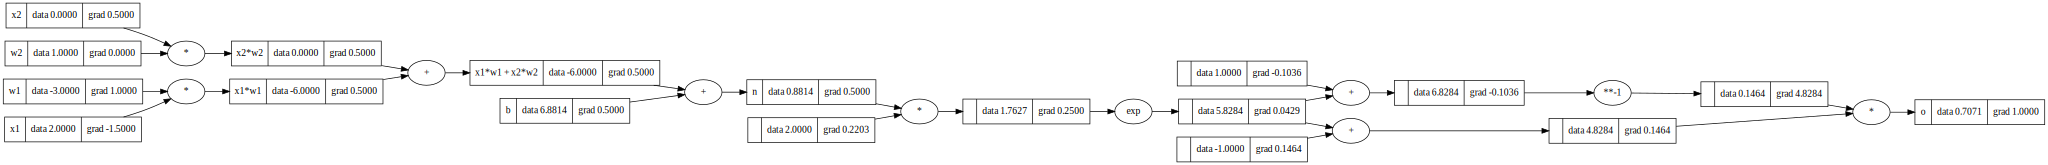

In [46]:
# inputs x1,x2
# 2d neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights of the neurons w1,w2
#synaptic strengths for each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

#---------------
#activation function output  
e = (2*n).exp()
o= (e-1)/(e+1)

o.label = 'o'
#---------------

o.backward()

draw_dot(o)

## Doing the same thing but in PyTorch : Comparison

In [47]:
import torch

#in default pytorch do not require gradients
x1 = torch.Tensor([2.0]).double()               ; x1.requires_grad= True
x2 = torch.Tensor([0.0]).double()               ; x2.requires_grad= True
w1 = torch.Tensor([-3.0]).double()              ; w1.requires_grad= True
w2 = torch.Tensor([-1.0]).double()              ; w2.requires_grad= True
b = torch.Tensor([6.8813735870195432]).double() ; b.requires_grad= True
n=x1*w1 + x2*w2 + b
o= torch.tanh(n)

print(o.data.item())
o.backward()

print("---")
print("x2",x2.grad.item())
print("w2",w2.grad.item())
print("x1",x1.grad.item())
print("w1",w1.grad.item())

0.7071066904050358
---
x2 -0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


## Build out a neural network library (multi-layer preceptron) in micrograd

In [48]:
import random

In [49]:
class Neuron:
    #nin is num of input
    def __init__(self, nin):
        # weight
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        #bias
        self.b = Value(random.uniform(-1,1))
    
    #x is input
    def __call__(self, x):
        #w*x+b
        #zip takes two iterators and it creates a new iterator that iterates over the tuples of the corressponding entries
        #activate function (forward)
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out=act.tanh()

        return out

    def parameters(self):
        return self.w +[self.b]

class Layer:
    #nout is number of output
    def __init__(self,nin,nout):
        self.neurons=[Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs=[n(x) for n in self.neurons]
        return outs[0] if len (outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

        
'''
Multilayer Perceptrons (MLP) are the classical type of neural network.
They are comprised of one or more layers of neurons. Data is fed to the input layer, 
there may be one or more hidden layers providing levels of abstraction, 
and predictions are made on the output layer, also called the visible layer.
'''
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]




![neuron](https://github.com/soonkienyuan/NOTE-build-from-scratch-neural-networks-Micrograd/blob/main/photo/Dense-Neural-Network.png?raw=true=10x10)

In [50]:
x=[2.0, 3.0,-1.0] # 3 dimentional input
n=MLP(3,[4,4,1]) # same as image above
'''
3 input layer, 2 hidden layer of 4 and 1 output
'''
n(x)

Value(data=-0.38672974842967556)

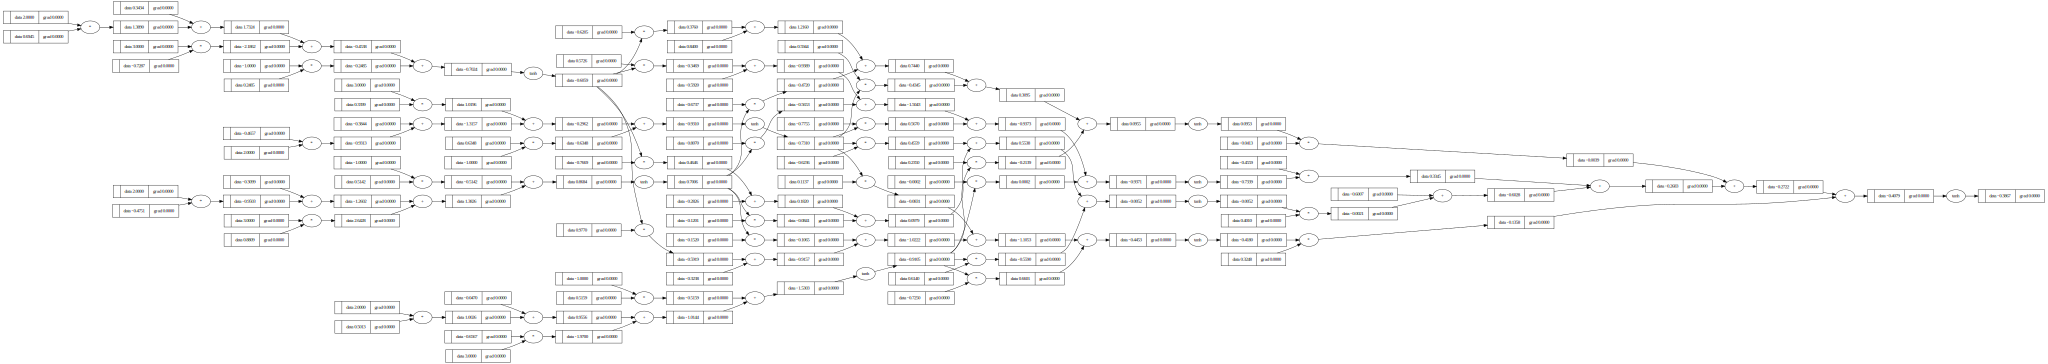

In [51]:
draw_dot(n(x))

## creating a tiny dataset, writing the loss function 

In [52]:
# 4 possible input in neural network
xs = [
  [2.0, 3.0, -1.0], # fed into neuron net to achive desired output (1.0)
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]


# 4 desired targets  (desired output)
ys = [1.0, -1.0, -1.0, 1.0] 

# '''
# we want to nueron net have this output (desired target) (1.0)  
# when fed this input [2.0, 3.0,-1.0] .....

# same for other 3 

# '''

ypred=[n(x) for x in xs]
ypred # get the predition. 


# for an example, the 1st prediction output is 0.93,
# but we would like the output answer will be 1,
# then we should put this higher

# The 2nd prediction output is -0.37,
# we want this output to become -1

# The 3rd prediction output is -0.46,
# we want this output becoe -1.0
  
# the 4th prediction output is -0.79
# we want this output to become 1

# so how do we make the neuron net and
# tune the weights to better predict the desired targets 

# The trick used in DP is to achieve this is to 
# calculate a single number that measure the total performance of the 
# neuron net. 

# We called it the loss



[Value(data=-0.38672974842967556),
 Value(data=-0.7340396873928154),
 Value(data=-0.49511198160508296),
 Value(data=-0.6645375013177659)]

In [53]:
"""
we intuitive sense that the neuron net is not performing well
becoz the predicted is not close to the desired target

Then the loss will be high and
we want to minimize the loss

we going to implement the mean square error loss

and we need to minimize the loss
"""
#ygt is y ground truth 
#yout is y output
loss=Value(0.0)
for element in [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]:
    loss=loss+ element
loss

Value(data=5.01935128747388)

In [54]:
loss.backward()

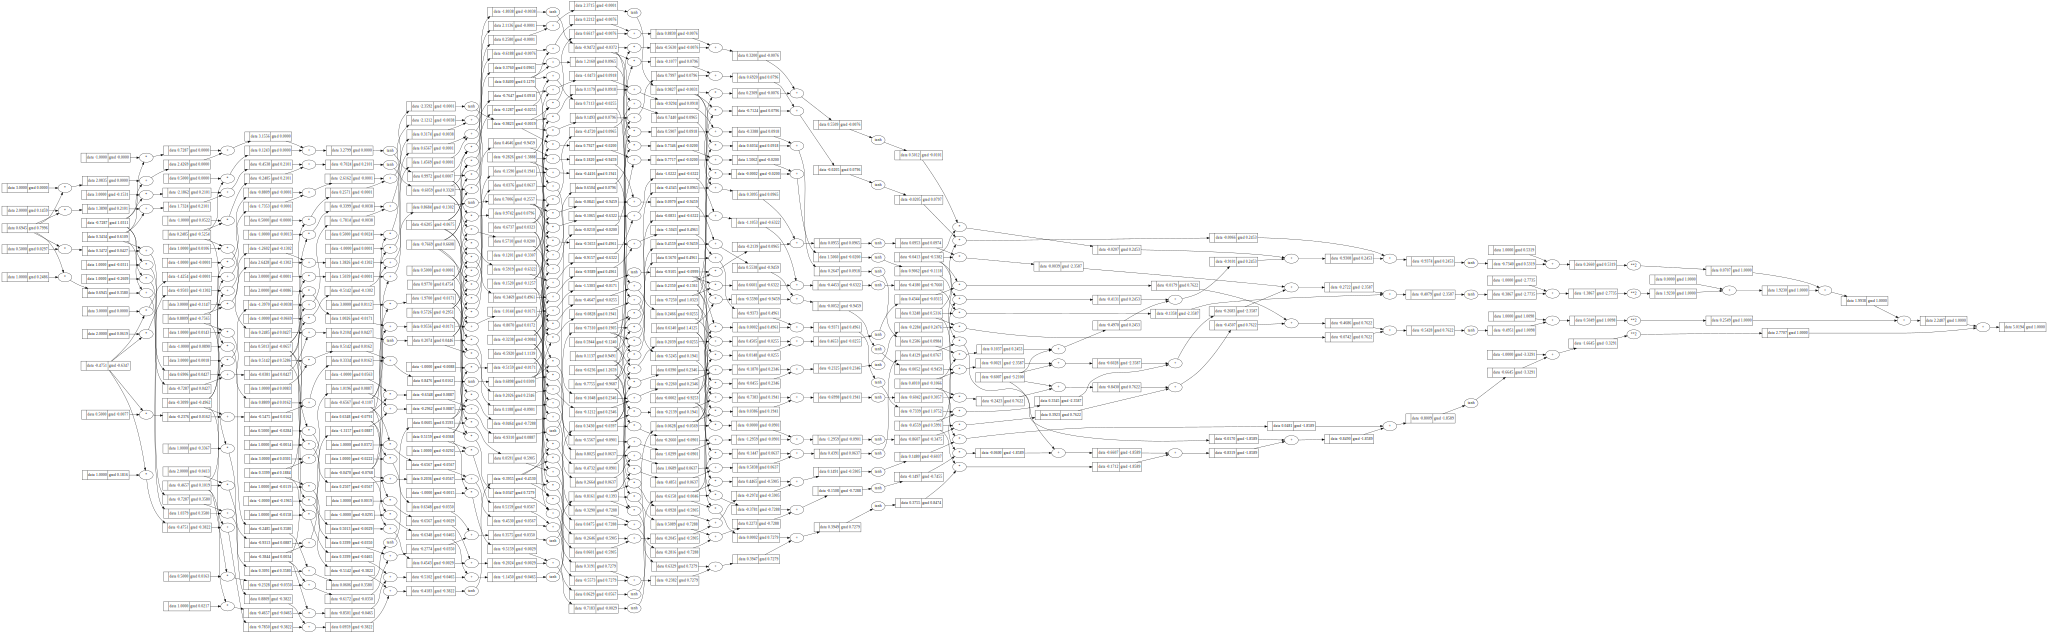

In [55]:
draw_dot(loss)

## collecting the all parameters of the neural net

In [56]:
n.parameters() # this mlp have 41 parameters

[Value(data=0.6944862112498664),
 Value(data=-0.7287399238194769),
 Value(data=0.2485319914929962),
 Value(data=0.3434020363106731),
 Value(data=-0.47513335870866635),
 Value(data=0.880922796179872),
 Value(data=0.5141606005678145),
 Value(data=-0.3099085859814632),
 Value(data=-0.46566529187477035),
 Value(data=0.3398556709765348),
 Value(data=0.634824524724412),
 Value(data=-0.38438764171755224),
 Value(data=0.5013080283254223),
 Value(data=-0.6566621378136166),
 Value(data=0.5159039673077441),
 Value(data=-0.04702079778692969),
 Value(data=-0.766905624122765),
 Value(data=-0.12005452533576655),
 Value(data=-0.6235777969228522),
 Value(data=0.6140117253274464),
 Value(data=-0.2826005531729592),
 Value(data=0.5726104151809608),
 Value(data=-0.8069566268536172),
 Value(data=-0.7755307896649843),
 Value(data=-0.0002465324079230502),
 Value(data=-0.5919978467305989),
 Value(data=-0.6205387534227997),
 Value(data=-0.6736735943894336),
 Value(data=0.5944120640527442),
 Value(data=0.2349846

In [57]:
len(n.parameters()) # this mlp have 41 parameters)

41

## doing the gradient descent optimization manually tranning the network


Gradient Descent:

We are thinking of the gradient as a vector pointing in the direction of increase loss

In gradient descent, we modify the data by small step size in the direction of gradient 

In [58]:
n.layers[0].neurons[0].w[0].grad

0.7996442402043451

In [59]:
n.layers[0].neurons[0].w[0].data

0.6944862112498664

Based the above, the gradient is negative

if the data goes lower, it will increase the loss.

This is becoz the derivative of this neuron is negative, increasing the data will make the loss goes down.

and vice versa

In [60]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [61]:
n.layers[0].neurons[0].w[0].data

0.686489768847823

for an example, the value from 0.4152 increase to 0.465.

This is good things , this is becoz slightly increase the data will make the loss goes down 

In [62]:
# the loss before gradient descent
#let we compare the loss

loss=Value(0.0)
for element in [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]:
    loss=loss+ element
loss

Value(data=5.01935128747388)

In [63]:
#the loss after gradient descent
ypred=[n(x) for x in xs]
loss=Value(0.0)
for element in [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]:
    loss=loss+ element
loss

Value(data=4.740447751904699)

### And we repeat and repeat to increase the data by a small step and then the loss will be less

In [64]:
loss.backward()

In [65]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [66]:
# this the forward pass
ypred=[n(x) for x in xs]
loss=Value(0.0)
for element in [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]:
    loss=loss+ element
loss

Value(data=4.157634907467142)

This is just gradient descent, we just iteratively doing the forward pass and backward pass.

Then the nueral network is improving its prediction.

When we repeat increase or decrease the data based on the gradient, the loss will be less and the output will closely to the desired output.

Take note we need to increase or decrease the data by a small step size is  to prevent the loss blow up.

This is becoz we dont know how structure the loss look like. 

In [67]:
ypred

[Value(data=-0.1728477105917946),
 Value(data=-0.6866268208491049),
 Value(data=-0.3874879379079065),
 Value(data=-0.519437191728332)]

## To make respectable and implement the actual tranning loop   

Let re-initialize the neural network

In [68]:
x=[2.0, 3.0,-1.0] # 3 dimentional input
n=MLP(3,[4,4,1]) # same as image above
'''
3 input layer, 2 hidden layer of 4 and 1 output
'''
n(x)

Value(data=0.839854918870242)

In [69]:
xs = [
  [2.0, 3.0, -1.0], # fed into neuron net to achive desired output (1.0)
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]


# 4 desired targets  (desired output)
ys = [1.0, -1.0, -1.0, 1.0] 


 


In [70]:
ypred=[n(x) for x in xs]
ypred # get the predition.

[Value(data=0.839854918870242),
 Value(data=0.4360286675583195),
 Value(data=0.7923071970405078),
 Value(data=0.8209369574940385)]

In [71]:
# 

for k in range(30):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss=Value(0.0)
  for element in [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]:
    loss=loss+ element
  
  # backward pass
  for p in n.parameters():
    # make sure that reset the grad=0
    #then the actual backward pass accumulates the
    #loss derivatives into the grads 
    p.grad = 0.0 
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.05 * p.grad
  
  print(k, loss.data)

0 5.332253442814073
1 3.0843120404243454
2 1.3706990001857353
3 0.6553159011005038
4 0.37868682581304786
5 0.25704341826620447
6 0.1921150925057555
7 0.15246372461218255
8 0.12595397954796098
9 0.10706630926017033
10 0.09296529247270294
11 0.08205575595381887
12 0.07337544264918246
13 0.06631107895857129
14 0.06045407644730137
15 0.0555220934080822
16 0.05131397400526459
17 0.047682639100382326
18 0.04451812658018036
19 0.0417366193011037
20 0.03927313720946969
21 0.037076544454663754
22 0.035106060640047794
23 0.0333287739022538
24 0.03171783616800411
25 0.03025113222822034
26 0.028910283847109565
27 0.027679894645277075
28 0.02654697058947856
29 0.025500470300738192


In [72]:
ypred

[Value(data=0.9534400358758365),
 Value(data=-0.9178288261184743),
 Value(data=-0.9065587467490156),
 Value(data=0.9114038916469112)]

## Summary

Neural network are the simple mathematics expression in the case of multi-layer perceptron that take input as the data and weight

The parameters of the neural network mathematics expression for the forward pass followed by a loss function.

The loss function try to measure the accuracy of the predictions and usually the loss will be low as your prediction matching your target or the network behaving well

We manipulate the loss function so that when the loss function is low, the network is doing what you want it to do on your problem

We backward the loss and use backpropagation to get the gradient and then we know how to tune all the parameters to decrease the loss locally.
Then we need to iterate the process many times in what's  called the gradient descent

Minimize the loss based on the gradient information.

